# ✈ Airlines Flights Dataset 

The Flights Booking Dataset of various Airlines has multiple features present like Source, Destination City, Arrival, Departure Time, Duration, Price of the flight, among others. 

In this part of the project will be doing a scarpper of the table provided on the previous process, here will determinate which columns are requiered to continue with the project.

This data is available as a parquet file for better management. 

We will be using the pandas libary to continue with the challenge.

The questions to answer are the following:

Q.1. Which are the airlines in the dataset, how many flights each one has?

Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

Q.3. Show Bar Graphs representing the Source City & Destination City.

Q.4. Does price varies with airlines ?

Q.5. Does ticket price change based on the departure time and arrival time?

Q.6. How the price changes with change in Source and Destination?

Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

Q.8. How does the ticket price vary between Economy and Business class?

Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

We will load the gold table that was created on the pipeline into the notebook, and since it was cleaned before there is no need for more steps.

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt

file_path = r'C:\Users\victo\Documents\Portfolio\Airlines_project\Data\clean\part-00000-0013aa55-d43c-49eb-a7c3-99996d32c982-c000.snappy.parquet'

df =  pd.read_parquet(file_path, engine="fastparquet")

df.info()
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int32  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int32  
 11  price             300153 non-null  int32  
dtypes: float64(1), int32(3), object(8)
memory usage: 24.0+ MB
               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000  

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,400,SpiceJet,SG-1061,Delhi,Early Morning,zero,Morning,Mumbai,Economy,2.33,4,5953
1,509,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Economy,15.58,4,12150
2,706,AirAsia,I5-784,Delhi,Evening,one,Early Morning,Mumbai,Economy,15.17,5,12990
3,722,Air India,AI-512,Delhi,Afternoon,one,Night,Mumbai,Economy,8.58,5,14670
4,1247,Air India,AI-540,Delhi,Night,one,Morning,Mumbai,Economy,11.42,8,12990


After loading the Data and checking that is all good we are ready to go, we will be asnwering each question at a time.


### Question 1: Which are the airlines in the dataset, how many flights each one has? 

airline    class   
Vistara    Economy     67270
           Business    60589
Air India  Economy     47994
Indigo     Economy     43120
Air India  Business    32898
GO FIRST   Economy     23173
AirAsia    Economy     16098
SpiceJet   Economy      9011
Name: count, dtype: int64


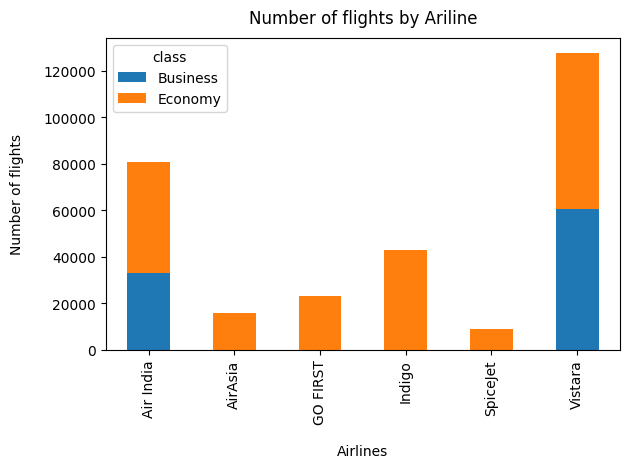

In [29]:
#Count the numbers of flighte for each airline 
print(df.value_counts(subset=['airline', 'class']))

df.value_counts(subset=['airline', 'class']).sort_values(ascending=False).unstack().plot.bar(stacked=True)

plt.xlabel("Airlines", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Number of flights by Ariline", y=1.02)
plt.tight_layout()
plt.show()

Answer: On the Data set there is a total of 6 Airlines with a Vistara been the airline with more flight with a total of 127,859. On the other part Spicejet is the one with the less numbers of flights with a total of 9011

### Question 2: Show Bar Graphs representing the Departure Time & Arrival Time.

departure_time
Morning          71146
Early Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late Night        1306
Name: count, dtype: int64


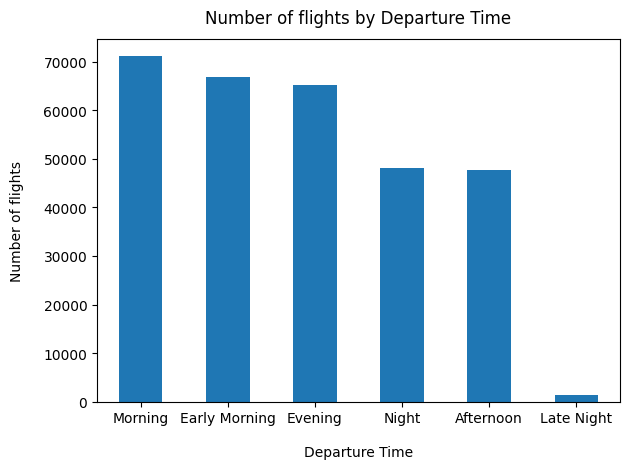

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early Morning    15417
Late Night       14001
Name: count, dtype: int64


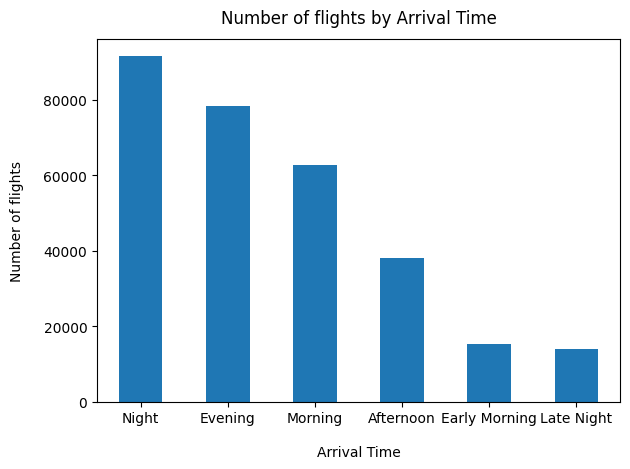

In [30]:
#Count the numbers of flighte for departure time and arrival time 
print(df.value_counts('departure_time'))
df.value_counts('departure_time').sort_values(ascending=False).plot.bar(rot= 0, legend=False)
plt.xlabel("Departure Time", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Number of flights by Departure Time", y=1.02)
plt.tight_layout()
plt.show()

print(df.value_counts('arrival_time'))
df.value_counts('arrival_time').sort_values(ascending=False).plot(kind='bar', rot=0, legend=False)
plt.xlabel("Arrival Time", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Number of flights by Arrival Time", y=1.02)
plt.tight_layout()
plt.show()

Answer: using the same method as before we can see that the people would rather departure early in the morning than on the evening/night and this leads to have more arrivals in the evening/night that in the morning.


### Question 3: Show Bar Graphs representing the Source City & Destination City.


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64


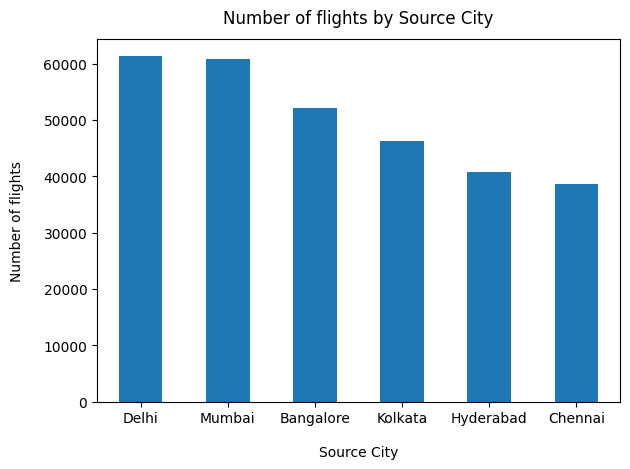

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


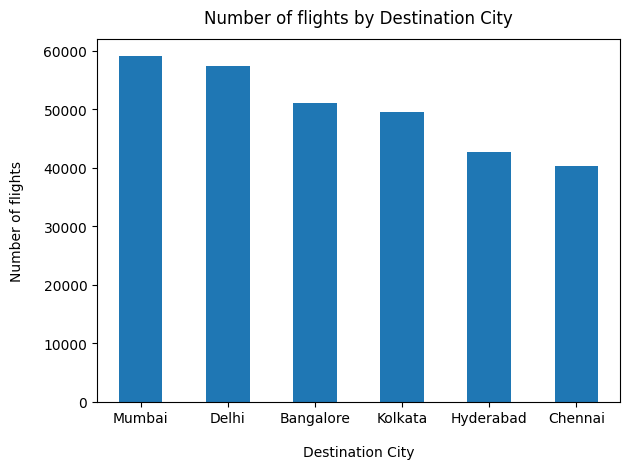

In [31]:
#Count the numbers of flighte for departure city and destination city 
print(df.value_counts('source_city'))
df.value_counts('source_city').sort_values(ascending=False).plot.bar(rot=0, legend=False)
plt.xlabel("Source City", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Number of flights by Source City", y=1.02)
plt.tight_layout()
plt.show()

print(df.value_counts('destination_city'))
df.value_counts('destination_city').sort_values(ascending=False).plot.bar(rot=0, legend=False)
plt.xlabel("Destination City", labelpad=14)
plt.ylabel("Number of flights", labelpad=14)
plt.title("Number of flights by Destination City", y=1.02)
plt.tight_layout()
plt.show()

Answer: The city with most departures is Delhi with a total of 61343 flights scheduled, on the other hand Mumbai is the city with most flight arrivals with a total of 59097

SInce all the graphs uses the same pattern to answer the questions we can merge this plots into a single one.


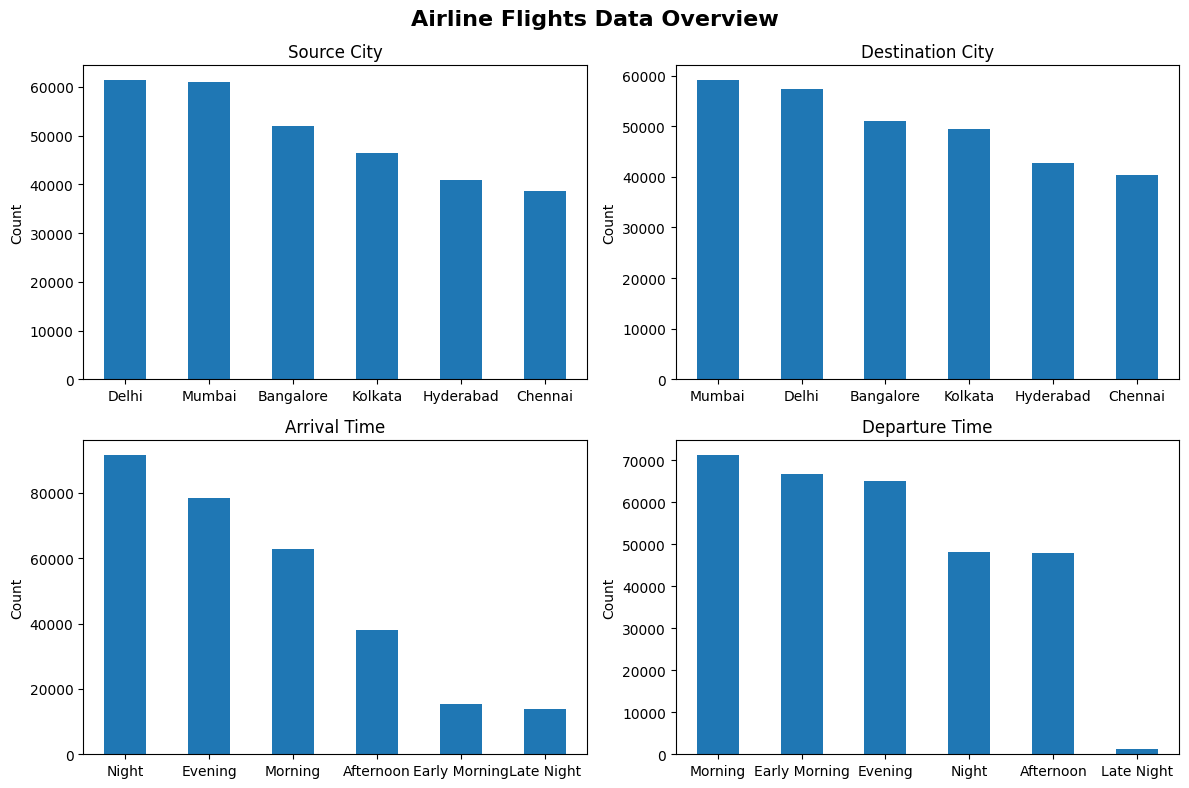

In [32]:
# Create figure 
fig, axis = plt.subplots(2, 2, figsize=(12, 8))

#Title of the figure
fig.suptitle('Airline Flights Data Overview', fontsize=16, fontweight='bold')

#Create a dictiornary with all the values from the plots
time_city = {
    "source_city": (0, 0, 'Source City'),
    "destination_city": (0, 1, 'Destination City'),
    "arrival_time": (1, 0, 'Arrival Time'),
    "departure_time": (1, 1, 'Departure Time')
}

for val, (row, col, title) in time_city.items():
    
    df.value_counts(val).sort_values(ascending=False).plot.bar(ax=axis[row, col], rot=0, xlabel='')
    axis[row, col].set_title(title)
    axis[row, col].set_ylabel('Count')
    

# Cosmetics of the plot
plt.tight_layout() 
plt.show()


### Question 4: Does price varies with airlines ?

This part will be split it into 2, since after checking the data we see that areolines work in two different types of classes, Economy and Bussiness

     airline    class  min_price  max_price   mean_price
0  Air India  Economy     1526.0    42349.0  7313.682169
1    AirAsia  Economy     1105.0    31917.0  4091.072742
2   GO FIRST  Economy     1105.0    32803.0  5652.007595
3     Indigo  Economy     1105.0    31952.0  5324.216303
4   SpiceJet  Economy     1106.0    34158.0  6179.278881
5    Vistara  Economy     1714.0    37646.0  7806.943645


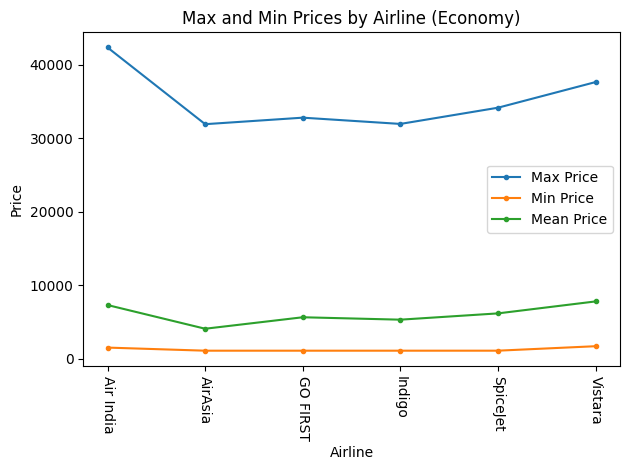

In [33]:
#Check the max, min and mean prices for earch airlines on Economy class
max_prices_economy = df.where(df['class'] == 'Economy').groupby(['airline','class'])\
               .agg(min_price=('price', 'min'), max_price=('price', 'max'), mean_price=('price', 'mean')).reset_index()

#Print the values obtained
print(max_prices_economy.head(15))

#Plot the values (max, min and mean) for each airline to see if it variates between airlines 
plt.plot(max_prices_economy['airline'], max_prices_economy['max_price'], '.-', label='Max Price')
plt.plot(max_prices_economy['airline'], max_prices_economy['min_price'], '.-', label='Min Price')
plt.plot(max_prices_economy['airline'], max_prices_economy['mean_price'], '.-', label='Mean Price')

#Plot comestics
plt.xticks(rotation=-90)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Max and Min Prices by Airline (Economy)')
plt.legend()
plt.tight_layout()
plt.show()

     airline     class  min_price  max_price    mean_price
0  Air India  Business    12000.0    90970.0  47131.039212
1    Vistara  Business    17604.0   123071.0  55477.027777


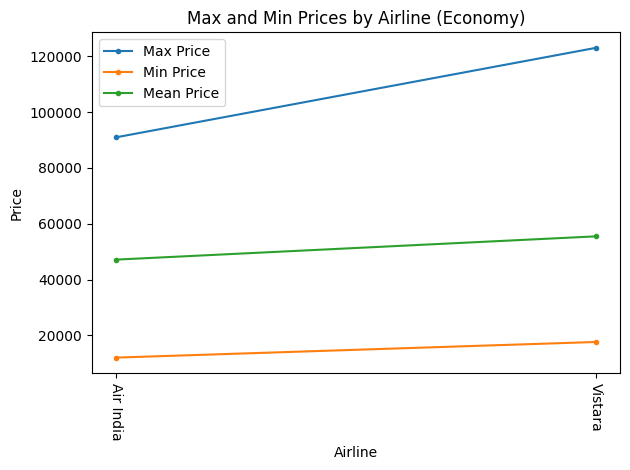

In [34]:
#Check the max, min and mean prices for earch airlines on Business class
max_prices_business = df.where(df['class'] == 'Business').groupby(['airline','class'])\
               .agg(min_price=('price', 'min'), max_price=('price', 'max'), mean_price=('price', 'mean')).reset_index()

#Print the values obtained
print(max_prices_business.head(2))

#Plot the values (max, min and mean) for each airline to see if it variates between airlines 
plt.plot(max_prices_business['airline'], max_prices_business['max_price'], '.-', label='Max Price')
plt.plot(max_prices_business['airline'], max_prices_business['min_price'], '.-', label='Min Price')
plt.plot(max_prices_business['airline'], max_prices_business['mean_price'], '.-', label='Mean Price')

#Plot comestics
plt.xticks(rotation=-90)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Max and Min Prices by Airline (Economy)')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
#Check the total of flights for each airline and class
display(df.groupby(by=['airline', 'class'])['airline'].value_counts())

airline    class   
Air India  Business    32898
           Economy     47994
AirAsia    Economy     16098
GO FIRST   Economy     23173
Indigo     Economy     43120
SpiceJet   Economy      9011
Vistara    Business    60589
           Economy     67270
Name: count, dtype: int64

Answer: as we can see for the Economy class it keeps an standar of 1100.00 rupees for their lower price, with the exception of Air India and Vistara, that their lower price goes up to 1500.00 and 1700.00 rupees respectively. On the high end we have a bigger discrepancy between prices for most airlines the price is around 31000.00 - 34000.00 rupees, but Air India and Vistara have more higher prices with value of 42349.00 and 37646.00 rupees respectively.

Regarding Business class Air India and Vistara are the only airlines that have this class, on the lower end they have a discrepancy of 5000.00 between each other since Air India they lower price is 12000.00 rupees and for Vistara is 17604.00 rupees. Now on the higher prices for this class they have a difference of 30000.00 rupees, with Air India giving a price of 90970.00 rupees and Vistara 123071.00 rupees

By leaving Air India and Vistara we can see that most airlines have an standar regarding their prices with a lower discrepancy between them, but Air India and Vistara seems to be presenting more high values on both ends and in their classes, this could be regarding been at more high demand that the other airlines.

### Question 5: Does ticket price change based on the departure time and arrival time?

For this question we will be using a heatmap since there are several times of departure an arrival.


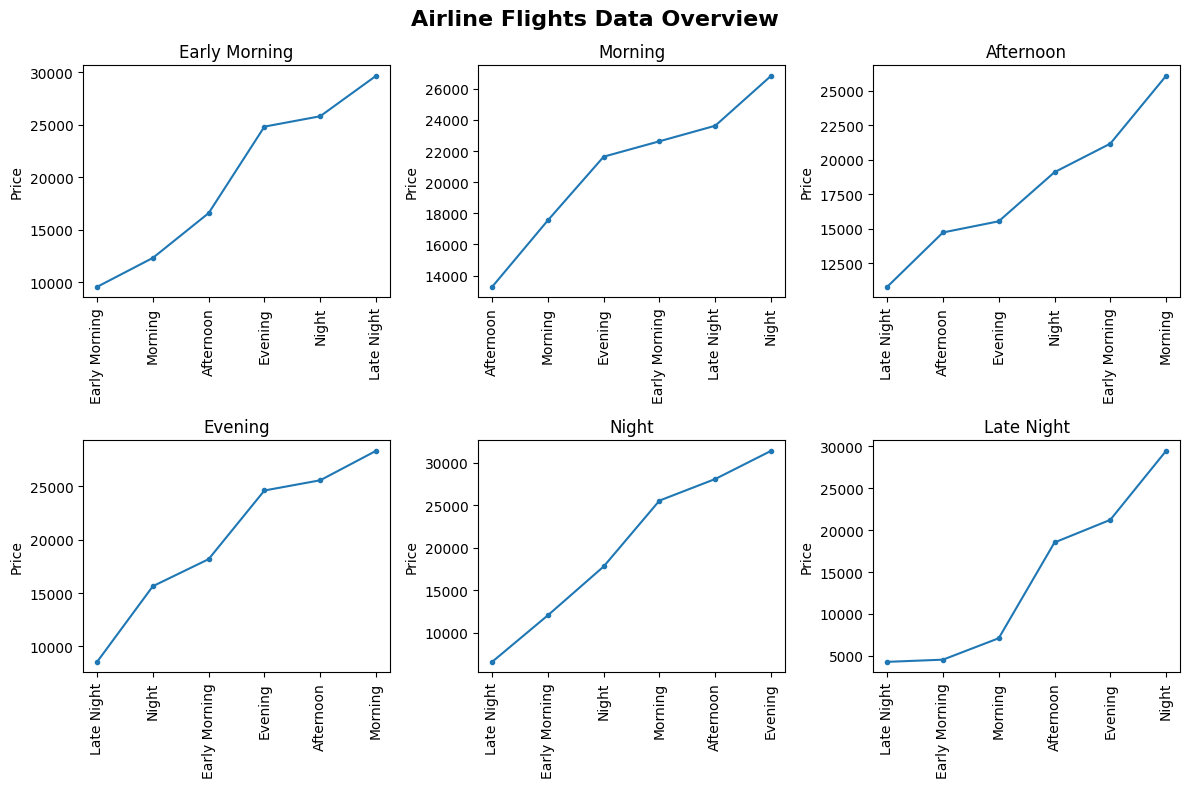

In [36]:
#Create a dictionary with all the departure times to loop throught it
time_slots = {
    "Early Morning": (0, 0),
    "Morning": (0, 1),
    "Afternoon": (0, 2),
    "Evening": (1, 0),
    "Night": (1, 1),
    "Late Night": (1, 2),
}

#Create figura
fig, axis = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Airline Flights Data Overview', fontsize=16, fontweight='bold')

#Iterate throught the dictionary to create the data for each departure time and grouping it by each arrival time to check the price flow
for time, (row, col) in time_slots.items():
    
    data = (
        df.where(df['departure_time'] == time).groupby(['arrival_time']).agg(mean_price=('price', 'mean'))\
          .reset_index().sort_values(by='mean_price')  
    )
    
    ax = axis[row, col]
    ax.plot(data['arrival_time'], data['mean_price'], '.-', label='Mean Price')
    ax.set_title(time)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=90)  # rotar ticks

# Ajustar layout
plt.tight_layout()
plt.show()

Answer: As the chart shows each of of them seems to be scaling depending on the arrival time, we will take the Morning chart as example for this as we can see the flights that start in the morning and arrive at night are the most expensive of all since this might be cause it comes from a far city or maybe does overlays in another airports, the cheapes flight is the one that start in the Morning and arrives in the afternoon, this might be due to be a direct fly and be short distance, by making corelation of the previous charts we can see that this is the flight from Delhi to Mumbai. As we can see the prices does variates depending on the departure time and arrival time.

### Question 6: How the price changes with change in Source and Destination?

Using the same loop as the question before we can explore the data regarding the price with source city and destination city


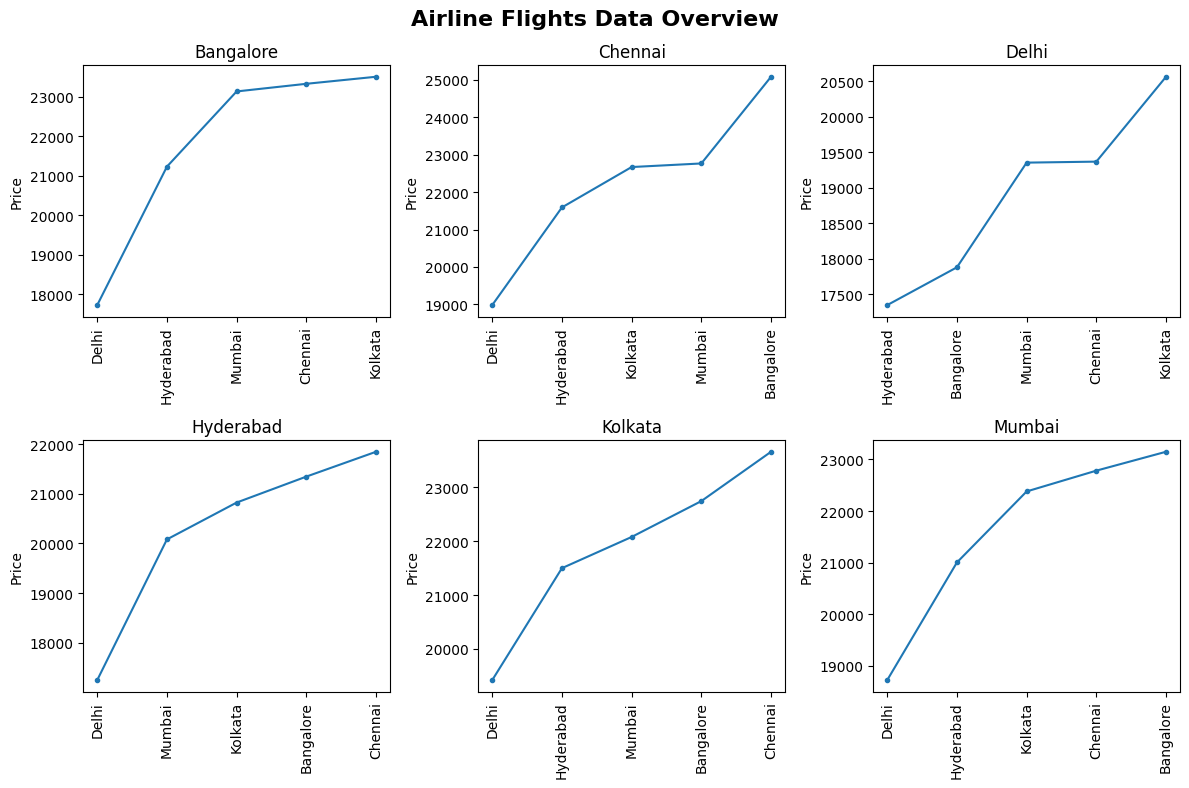

In [37]:
#Create a dictionary with all the source cities to loop throught it
source_cities = {
    "Bangalore": (0, 0),
    "Chennai": (0, 1),
    "Delhi": (0, 2),
    "Hyderabad": (1, 0),
    "Kolkata": (1, 1),
    "Mumbai": (1, 2),
}

#Create figura
fig, axis = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Airline Flights Data Overview', fontsize=16, fontweight='bold')

#Iterate throught the dictionary to create the data for each source city and grouping it by each destination city to check the price flow 
for city, (row, col) in source_cities.items():
    
    data = (
        df.where(df['source_city'] == city).groupby(['destination_city']).agg(mean_price=('price', 'mean'))\
          .reset_index().sort_values(by='mean_price')  
    )
    
    ax = axis[row, col]
    ax.plot(data['destination_city'], data['mean_price'], '.-', label='Mean Price')
    ax.set_title(city)
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=90)  # rotar ticks

# Ajustar layout
plt.tight_layout()
plt.show()

Answer: As the plots shows the prices does changes by destination city and by source city, the flight with the highest prices is Chennai to Bangalore, by looking at previous chart this might be due because Chennai is not such an active airport since is the lowest one with a total of 38700 rupees and the time of purchase of the ticket.

### Question 7: How is the price affected when tickets are bought in just 1 or 2 days before departure?

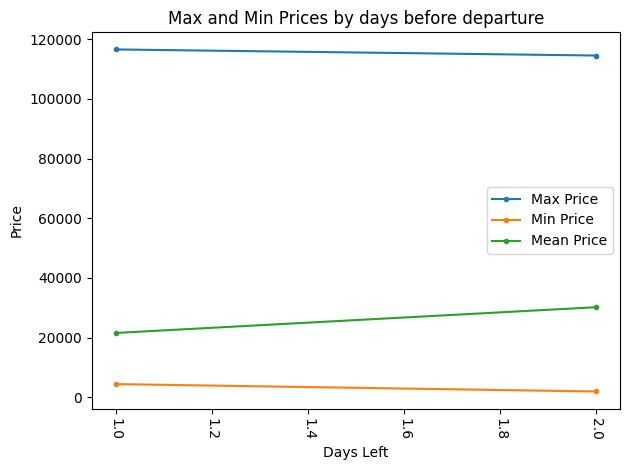

In [38]:
#Filter the DF to get just the flight with 2 days or less before departure 
before_departure = df[df['days_left'] <= 2].groupby(['days_left'])\
                .agg(min_price=('price', 'min'), max_price=('price', 'max'), mean_price=('price', 'mean')).reset_index()


#Plot the values (max, min and mean) for each airline to see if it variates between airlines 
plt.plot(before_departure['days_left'], before_departure['max_price'], '.-', label='Max Price')
plt.plot(before_departure['days_left'], before_departure['min_price'], '.-', label='Min Price')
plt.plot(before_departure['days_left'], before_departure['mean_price'], '.-', label='Mean Price')

#Plot comestics
plt.xticks(rotation=-90)
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Max and Min Prices by days before departure')
plt.legend()
plt.tight_layout()
plt.show()

Answer: The plot is showing us the behaviour of the price when its one and two days left before departure, one the highest price and the lowest we don't see any significant change between prices, the mean shows a significant decrement when is one day left before the flight.

### Question 8: How does the ticket price vary between Economy and Business class?

### This question was answered in the question 4 when we did a price comparation between airlines and classes 

### Question 9: What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [39]:
#Filter the DF to get only the flights of Vistara that goes from Delhi to Hyderabad in business class
filtered_flights = df.where((df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & (df['destination_city'] == 'Hyderabad') & (df['class'] == 'Business')).dropna()

#Use describe to get the average (mean) price for the flight with this conditions
filtered_flights['price'].describe()

count      1660.000000
mean      47939.840361
std       11856.129244
min       24056.000000
25%       46097.000000
50%       51697.000000
75%       53937.000000
max      114507.000000
Name: price, dtype: float64

Answer: The price for an average flight from Delhi to Hyderabad in Business class by Vistara has a value of 47939.84 rupees 

### Final Thoughts

In this project we explored the different prices of flights according to the different parameters that were gived such as airline, city source, destination, departure time and among others.

Class is the strongest determinant, with Business and First Class fares averaging several times higher than Economy.

Airlines as Air India and Vistara can be considered premium carriers, tend to generally charge more than their low-cost competitors.

Departure time plays a smaller but notable role, with early morning and late-night flights typically being more affordable.

Overall, travelers seeking lower fares should prioritize Economy class and off-peak departure times. While airline choice matters, class and timing remain the most decisive factors in ticket pricing.

